# 🧠 MNIST Dataset Overview

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a large collection of handwritten digits commonly used for training various image processing systems.

---

## 📊 Dataset Details

- **Total Images**: 70,000
  - **Training Set**: 60,000 images
  - **Test Set**: 10,000 images
- **Image Size**: 28x28 pixels
- **Color Channels**: Grayscale (1 channel)
- **Classes**: Digits from 0 to 9 (10 classes)

---

## 🖼️ Sample Images

Here are a few sample images from the MNIST dataset:

![MNIST Digits](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

---

## 🔍 Common Uses

- Training and benchmarking machine learning models
- Image classification tasks
- Testing convolutional neural networks (CNNs)

---


## 📥 Necessary Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## 📦 Load the data



In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# 🧠 MNIST Dataset EDA

## 🔢 Visualize Sample Digits


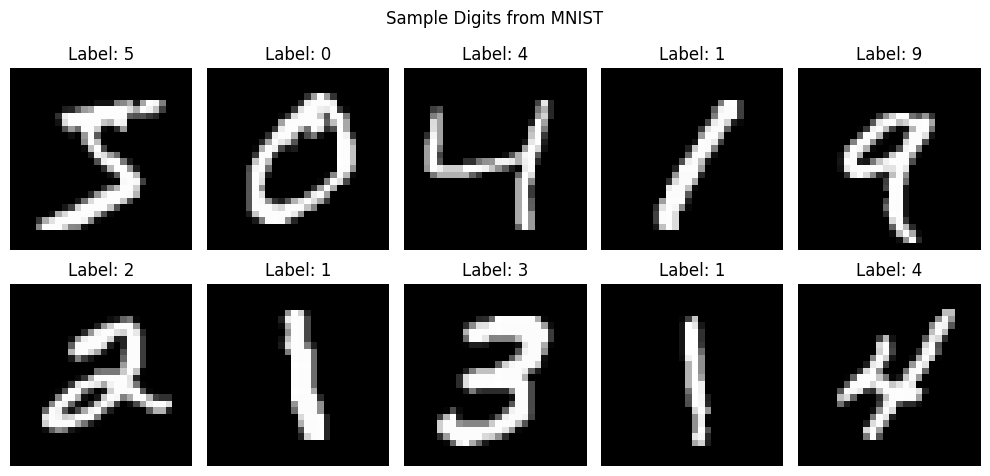

In [ ]:
plt.figure(figsize=(10,5));
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from MNIST")
plt.tight_layout()
plt.show()

## 📊 Check Label Distribution

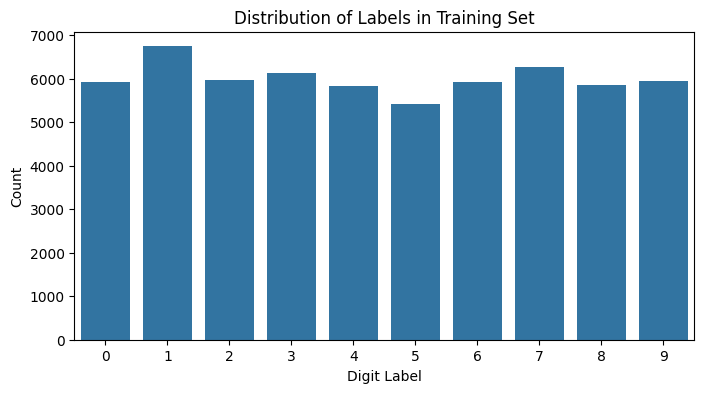

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

## ⚖️ Normalize the Data

In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

## ✅ Verify normalization range


In [ ]:
print(f"x_train_normalized range: {x_train_normalized.min()} to {x_train_normalized.max()}")

x_train_normalized range: 0.0 to 1.0


## 📝 Conclusion

- The MNIST dataset contains **60,000 training images** and **10,000 test images** of handwritten digits (0-9), each sized 28x28 pixels in grayscale.
- Visualization of sample digits confirms the dataset’s diversity and quality for digit recognition tasks.
- The label distribution is **well-balanced** across all classes, making it suitable for training unbiased models.
- Normalizing pixel values to the range **[0, 1]** helps improve model convergence and performance during training.

This basic EDA provides a solid foundation for building and evaluating machine learning models on the MNIST dataset.


## 🔀 Split Data into Train/Test Sets `(already done)`

## 🎯 Baseline model using Logistic Regression from scikit-learn


## 🧩 Flatten data as required by Logistic Regression


In [11]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [12]:
model = LogisticRegression(max_iter=100, solver='saga', multi_class='multinomial', n_jobs=-1, verbose=1)

model.fit(x_train_flat, y_train)

y_pred = model.predict(x_test_flat)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 272 seconds
Accuracy: 0.9255

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.91      0.86      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 🚀 Upgrade Model


## 🧠 Simple MLP (Fully Connected Neural Network)


## 🎯 One-hot encode labels

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 🏗️ Build MLP model


In [16]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 🏋️‍♂️ Train and evaluate


In [17]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8072 - loss: 5.2556 - val_accuracy: 0.9183 - val_loss: 0.3504
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.9234 - loss: 0.3344 - val_accuracy: 0.9402 - val_loss: 0.2421
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9424 - loss: 0.2134 - val_accuracy: 0.9543 - val_loss: 0.1688
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9563 - loss: 0.1577 - val_accuracy: 0.9622 - val_loss: 0.1494
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9622 - loss: 0.1357 - val_accuracy: 0.9645 - val_loss: 0.1351
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9649 - loss: 0.1224 - val_accuracy: 0.9687 - val_loss: 0.1100
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9705 - loss: 0.1012 - val_accuracy: 0.9658 - val_loss: 0.1323
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9719 - loss: 0

## 🖼️ CNN (Convolutional Neural Network) for Better Accuracy


## 🔄 Reshape data for CNN: add channel dimension


In [18]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

## 🏗️ Build CNN model


In [19]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 🏋️‍♂️ Train and evaluate


In [25]:
history = cnn_model.fit(
    x_train_cnn, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

y_pred_prob = cnn_model.predict(x_test_cnn)
y_pred = np.argmax(y_pred_prob, axis=1)

Epoch 1/10
844/844 - 50s - 59ms/step - accuracy: 0.9824 - loss: 0.0606 - val_accuracy: 0.9895 - val_loss: 0.0467
Epoch 2/10
844/844 - 79s - 94ms/step - accuracy: 0.9844 - loss: 0.0535 - val_accuracy: 0.9900 - val_loss: 0.0461
Epoch 3/10
844/844 - 86s - 102ms/step - accuracy: 0.9847 - loss: 0.0508 - val_accuracy: 0.9910 - val_loss: 0.0410
Epoch 4/10
844/844 - 76s - 90ms/step - accuracy: 0.9865 - loss: 0.0462 - val_accuracy: 0.9875 - val_loss: 0.0526
Epoch 5/10
844/844 - 49s - 58ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9907 - val_loss: 0.0392
Epoch 6/10
844/844 - 81s - 96ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 0.9878 - val_loss: 0.0562
Epoch 7/10
844/844 - 83s - 98ms/step - accuracy: 0.9876 - loss: 0.0427 - val_accuracy: 0.9915 - val_loss: 0.0433
Epoch 8/10
844/844 - 81s - 96ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9897 - val_loss: 0.0606
Epoch 9/10
844/844 - 83s - 98ms/step - accuracy: 0.9886 - loss: 0.0375 - val_accuracy: 0.9885 -

## 🔄 Converting back to original integer labels


In [26]:
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

## 📉 Confusion matrix, Plot training/validation curves for final CNN model with highest accuracy


## 🎯 Accuracy score


In [36]:
acc = accuracy_score(y_test_labels, y_pred)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9894


## 🧮 Confusion matrix


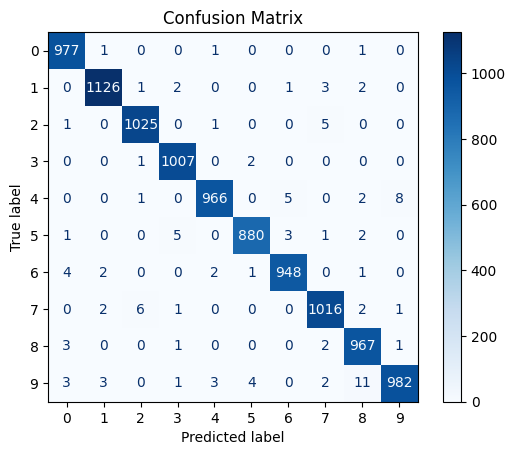

In [28]:
cm = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## 📈 Plot training & validation accuracy/loss curves


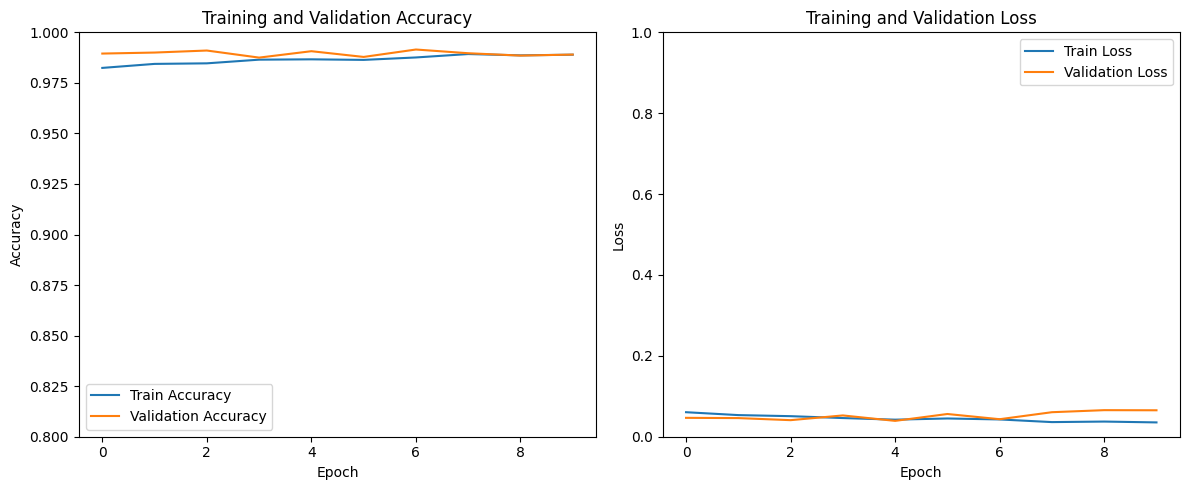

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()



## 📝 Final Report: Handwritten Digit Classification on MNIST

---

## 1. Introduction

This report presents the results of three models applied to the MNIST handwritten digit dataset:

- Logistic Regression (baseline)
- Fully Connected Neural Network (Sequential MLP)
- Convolutional Neural Network (CNN)

The goal was to classify grayscale 28x28 pixel images into one of 10 digit classes (0-9).

---

## 2. Logistic Regression Results

### Performance Metrics
- **Overall accuracy:** 93%
- **Macro average F1-score:** 0.92

### Observations

- The Logistic Regression baseline performs well with a solid overall accuracy.
- Some confusion exists among digits 2, 3, 5, and 8, which are visually similar, as reflected in slightly lower precision and recall.
- The model provides a strong starting point for classification but leaves room for improvement.

---

## 3. Sequential (MLP) Model Results

- Training accuracy reached approximately **97.6%**.
- Validation accuracy peaked at around **96.8%**.
- On the test set, the model achieved an accuracy of **96.4%**.

This demonstrates an improvement over the Logistic Regression baseline, thanks to the network's ability to learn nonlinear patterns.

---

## 4. Convolutional Neural Network (CNN) Results

- The CNN further improved performance with a **test accuracy of 98.94%**.
- The model architecture utilized convolutional and max-pooling layers to extract spatial features effectively.
- Training and validation curves show stable training with minimal overfitting.
- The confusion matrix indicates strong class-wise predictions, with few misclassifications.

---


## 5. Conclusion

- The Logistic Regression model provides a strong baseline with **93% accuracy**.
- Using a Sequential MLP network increased accuracy to about **96.4%** by capturing nonlinear relationships.
- The CNN model achieved the best performance (**98.94% accuracy**) by leveraging spatial features in images.
- Visual analysis of confusion matrices and learning curves confirms model robustness and balanced class performance.
- Further improvements could include data augmentation, hyperparameter tuning, or deeper architectures.

---

## 7. Future Work

- Explore more complex CNN architectures (e.g., ResNet, DenseNet).
- Implement dropout and batch normalization for better regularization.
- Utilize data augmentation to enhance generalization.
- Experiment with learning rate schedules and optimizer variants.

---
